<center><h1>DSCI-552 Project</h1></center>
<br>


### I Chen Yang
### GitHub ID:ichenyang
### 8260207588

In [49]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras

import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

print(f"Keras version {keras.__version__}")
print(tf.config.list_physical_devices() )

Keras version 2.8.0
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


### (b)

##### i. You can use binary encoding for the sentiments , i.e y = 1 for positive sentiments and y = −1 for negative sentiments.

In [50]:
Paths = []
X = [] # X are input string data
Y = [] # y\in{1,-1} are labels

for data_path in ['../data/neg', '../data/pos']:
  for filename in os.listdir(data_path):
    f = os.path.join(data_path, filename)
    if os.path.isfile(f) and filename.endswith(".txt"):
      with open(f, "r") as text_file:
        read_text = text_file.read()
        Paths.append(f)
        X.append(read_text)
        Y.append(2*(data_path == 'pos')-1)

##### ii. The data are pretty clean. Remove the punctuation and numbers from the data.

In [51]:
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

X_clean = []
for x in X:
  for ele in x:
    if ele in punc:
        x = x.replace(ele, "")
  X_clean.append(''.join(i for i in x if not i.isdigit()))

##### iii. The name of each text file starts with cv number. Use text files 0-699 in each class for training and 700-999 for testing.

In [52]:
x_train = []
x_test = []
y_train = []
y_test = []
for p, x, y in zip(Paths, X_clean, Y):
  p_id = int(p.split('cv')[-1].split('_')[0])
  if(p_id <= 699):
      x_train.append(x)
      y_train.append(y)
  else:
      x_test.append(x)
      y_test.append(y)

assert len(x_train)==1400 and len(y_train)==1400 and len(x_test)==600 and len(y_test)==600

##### iv. Count the number of unique words in the whole dataset (train + test) and print it out.

In [53]:
words = []
for text in x_train + x_test:
  t = text.lower()
  word = t.split()
  words = words + word

print(f"Number of unique words: {len(set(words))}")

Number of unique words: 47156


##### v. Calculate the average review length and the standard deviation of review lengths. Report the results.

In [54]:
num_words = []
for text in x_train + x_test:
  t = text.lower()
  word = t.split()
  num_words.append(len(word))

print(f"Average review length: {np.mean(num_words)} words")
print(f"S.D. of review length: {np.std(num_words)} words")

Average review length: 644.5415 words
S.D. of review length: 285.01493518366715 words


##### vi. Plot the histogram of review lengths.

[Text(0.5, 0, 'Review length in words')]

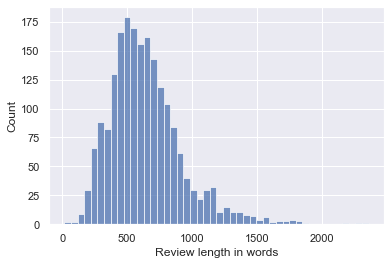

In [55]:
gfg = sns.histplot(data=num_words)
gfg.set(xlabel ="Review length in words")

##### vii. To represent each text (= data point), there are many ways. In NLP/Deep Learning terminology, this task is called tokenization. It is common to represent text using popularity/ rank of words in text. The most common word in the text will be represented as 1, the second most common word will be represented as 2, etc. Tokenize each text document using this method.

In [56]:
from keras.preprocessing.text import Tokenizer

t = Tokenizer()
t.fit_on_texts(x_train) # To Check: should x_test be included?

# Encode training data sentences into sequences
train_sequences = t.texts_to_sequences(x_train)
test_sequences = t.texts_to_sequences(x_test)
print(len(train_sequences[0]))

# # Get max training sequence length
# maxlen = max([len(x) for x in train_sequences])
# print(maxlen)

1073


In [57]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation, Embedding, Flatten

# integer encode the documents
vocab_size = 5000
train_sequences = [one_hot(d, vocab_size) for d in x_train]
test_sequences = [one_hot(d, vocab_size) for d in x_test]
print(len(encoded_docs[0]))

2


##### viii. Select a review length L that 70% of the reviews have a length below it. If you feel more adventurous, set the threshold to 90%.

##### Ans: One can determine L by looking-up the inverse CDF of review length at ~70%

In [58]:
x, counts = np.unique(num_words, return_counts=True)
cusum = np.cumsum(counts)
cdf = cusum / cusum[-1]
L = x[np.where(cdf > 0.7)][0]
print(f"L = {L}")

L = 737


##### ix. Truncate reviews longer than L words and zero-pad reviews shorter than L so that all texts (= data points) are of length L.

In [59]:
from keras.preprocessing.sequence import pad_sequences

# Truncate/Pad the training/testing sequences
train_padded = pad_sequences(train_sequences, padding='post', truncating='post', maxlen=L)
test_padded  = pad_sequences(test_sequences, padding='post', truncating='post', maxlen=L)

### (c) 

### i

In [60]:
train_padded = train_padded*(train_padded <= 4999)
test_padded = test_padded*(test_padded <= 4999)

In [61]:
from keras.layers import Embedding
emb_layer = Embedding(5000, 32, input_length=L)
x_emb = emb_layer(train_padded)
print(x_emb.shape)

(1400, 737, 32)


### ii 

In [62]:
from keras.layers import Flatten
flat_layer = Flatten()
x_emb_flat = flat_layer(x_emb)
print(x_emb_flat.shape)

(1400, 23584)


### (d)

### i

In [84]:
import numpy as np
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation, Embedding, Flatten
# test
docs = ['Well done!',
		'Good work',
		'Great effort',
		'nice work',
		'Excellent!',
		'Weak',
		'Poor effort!',
		'not good',
		'poor work',
		'Could have done better.']

# define class labels
labels = [1,1,1,1,1,0,0,0,0,0,]
# integer encode the documents
vocab_size = 50
encoded_docs = [one_hot(d, vocab_size) for d in docs]
print(encoded_docs)
# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)
# define the model
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
print(model.summary())
# fit the model
model.fit(padded_docs, np.array(labels), epochs=50)
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, np.array(labels))
print('Accuracy: %f' % (accuracy*100))

[[45, 1], [10, 10], [8, 34], [11, 10], [18], [44], [31, 34], [29, 10], [31, 10], [12, 47, 1, 37]]
[[45  1  0  0]
 [10 10  0  0]
 [ 8 34  0  0]
 [11 10  0  0]
 [18  0  0  0]
 [44  0  0  0]
 [31 34  0  0]
 [29 10  0  0]
 [31 10  0  0]
 [12 47  1 37]]
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 4, 8)              400       
                                                                 
 flatten_7 (Flatten)         (None, 32)                0         
                                                                 
 dense_44 (Dense)            (None, 1)                 33        
                                                                 
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
1/1 [==============================] - 0s 424ms/step -

In [88]:
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation

model = Sequential()

model.add(emb_layer)
model.add(flat_layer)

model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

print(model.summary())



Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 737, 32)           160000    
                                                                 
 flatten_4 (Flatten)         multiple                  0         
                                                                 
 dense_49 (Dense)            (None, 50)                1179250   
                                                                 
 dropout_35 (Dropout)        (None, 50)                0         
                                                                 
 dense_50 (Dense)            (None, 50)                2550      
                                                                 
 dropout_36 (Dropout)        (None, 50)                0         
                                                                 
 dense_51 (Dense)            (None, 50)              

### (d) ii

In [89]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_padded, np.array(y_train)*1, batch_size=10, epochs=2)

# get train accuracy
loss, trn_accuracy = model.evaluate(train_padded, np.array(y_train), batch_size=len(train_padded))

# evaluate the model
loss, tst_accuracy = model.evaluate(test_padded, np.array(y_test), batch_size=len(test_padded))

Epoch 1/2
140/140 [==============================] - 1s 6ms/step - loss: -609842.8125 - accuracy: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 131ms/step - loss: -124617936.0000 - accuracy: 0.0000e+00


In [90]:
print(f"train accuracy = {trn_accuracy*100:.2f} %")
print(f"test  accuracy = {tst_accuracy*100:.2f} %")

train accuracy = 0.00 %
test  accuracy = 0.00 %


### (e) i

In [78]:
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation, Conv1D, MaxPooling1D

model = Sequential()

model.add(emb_layer)
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(flat_layer)
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

print(model.summary())

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 737, 32)           160000    
                                                                 
 conv1d_3 (Conv1D)           (None, 737, 32)           3104      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 368, 32)          0         
 1D)                                                             
                                                                 
 flatten_4 (Flatten)         multiple                  0         
                                                                 
 dense_38 (Dense)            (None, 50)                588850    
                                                                 
 dropout_27 (Dropout)        (None, 50)                0         
                                                     

### (e) ii

In [79]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_padded, np.array(y_train)*1, batch_size=10, epochs=2)

# evaluate the model(Test)
loss, accuracy = model.evaluate(test_padded, np.array(y_test))

Epoch 1/2
140/140 [==============================] - 2s 9ms/step - loss: -3039061.0000 - accuracy: 0.0000e+00
Epoch 2/2
19/19 [==============================] - 0s 4ms/step - loss: -2095281792.0000 - accuracy: 0.0000e+00


In [80]:
# evaluate the model(Train)
loss, accuracy = model.evaluate(train_padded, np.array(y_train))

44/44 [==============================] - 0s 3ms/step - loss: -2099345792.0000 - accuracy: 0.0000e+00


### (f) i

In [81]:
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation, LSTM

model = Sequential()

model.add(emb_layer)
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

print(model.summary())

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 737, 32)           160000    
                                                                 
 lstm_3 (LSTM)               (None, 100)               53200     
                                                                 
 dropout_30 (Dropout)        (None, 100)               0         
                                                                 
 dense_42 (Dense)            (None, 256)               25856     
                                                                 
 dropout_31 (Dropout)        (None, 256)               0         
                                                                 
 dense_43 (Dense)            (None, 1)                 257       
                                                                 
Total params: 239,313
Trainable params: 239,313
Non-t

### (f) ii

In [82]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_padded, np.array(y_train)*1, batch_size=10, epochs=20)

# evaluate the model(test)
loss, accuracy = model.evaluate(test_padded, np.array(y_test))

Epoch 1/20
140/140 [==============================] - 26s 177ms/step - loss: -189.3428 - accuracy: 0.0000e+00
Epoch 2/20
140/140 [==============================] - 36s 257ms/step - loss: -1365.5400 - accuracy: 0.0000e+00
Epoch 3/20
140/140 [==============================] - 41s 296ms/step - loss: -3783.3086 - accuracy: 0.0000e+00
Epoch 4/20
140/140 [==============================] - 46s 330ms/step - loss: -7416.2900 - accuracy: 0.0000e+00
Epoch 5/20
140/140 [==============================] - 49s 353ms/step - loss: -12153.0225 - accuracy: 0.0000e+00
Epoch 6/20
140/140 [==============================] - 45s 317ms/step - loss: -18120.0449 - accuracy: 0.0000e+00
Epoch 7/20
140/140 [==============================] - 32s 228ms/step - loss: -25083.9062 - accuracy: 0.0000e+00
Epoch 8/20
140/140 [==============================] - 30s 212ms/step - loss: -33247.3320 - accuracy: 0.0000e+00
Epoch 9/20
140/140 [==============================] - 29s 209ms/step - loss: -42405.5859 - accuracy: 0.0000e+

In [83]:
# evaluate the model(train)
loss, accuracy = model.evaluate(test_padded, np.array(y_test))

19/19 [==============================] - 3s 160ms/step - loss: -207735.0781 - accuracy: 0.0000e+00
